#MODEL 3 - Weather Pattern Analysis (Clustering)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load data

*   Firstly, we load the melbourne_weather.csv data file which is the result of our data pre-processing part.

*   To get this data file, please refer to our Data Processing notebook's instructions.

*   Next we display the first few rows and data info.

In [ ]:
# Load the data
origin_df = pd.read_csv('melbourne_weather.csv')

# Display the first few rows and data info
print(origin_df.head())
print(origin_df.info())

         Date   Location  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  2008-07-01  Melbourne       2.0          2.8       7.0           13   
1  2008-07-02  Melbourne       0.6          5.2       4.0           13   
2  2008-07-03  Melbourne       1.4          2.0       0.8           13   
3  2008-07-04  Melbourne       0.6          1.8       4.2            0   
4  2008-07-05  Melbourne       0.0          0.8       8.4            3   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  sealevelpressure  \
0           63.0          13          13          37.0  ...            1007.1   
1           63.0          13          15          30.0  ...            1014.6   
2           39.0          13          13          17.0  ...            1023.8   
3           19.0           6           3           9.0  ...            1028.4   
4           52.0           3           5          24.0  ...            1026.1   

   cloudcover  visibility  solarradiation  solarenergy  uvindex  sun

## 2. Season Clustering





*  Data need to be standardized to ensure all features contribute equally to the K means clustering.

*   **Feature Selection**: Select important features such as temperature, humidity, evaporation, cloud cover, and rainfall to identify different weather patterns.
*   **Data Cleaning**: Remove rows with missing values using (.dropna()) to ensure the dataset is ready for accurate analysis.


*   **Standardization**: Use StandardScaler() to scale the features so that variables like temperature (which have large range value) don't dominate others like rainfall (which have smaller values).



In [ ]:
# Select features for clustering
features = ['temp', 'humidity', 'Evaporation', 'cloudcover', 'Rainfall']
# features = ['temp', 'Evaporation', 'precip']
df = origin_df[['Date'] + features]
df.dropna(inplace=True)

# Display the cleaned dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2435 entries, 0 to 3192
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2435 non-null   object 
 1   temp         2435 non-null   float64
 2   humidity     2435 non-null   float64
 3   Evaporation  2435 non-null   float64
 4   cloudcover   2435 non-null   float64
 5   Rainfall     2435 non-null   float64
dtypes: float64(5), object(1)
memory usage: 133.2+ KB
None


<ipython-input-11-1e987330e829>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
# Prepare the data
X = df[features]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the scaled features
print(pd.DataFrame(X_scaled, columns=features).head())

       temp  humidity  Evaporation  cloudcover  Rainfall
0 -0.755722 -0.630257    -0.548600   -0.148102  0.025300
1 -0.859625  0.149541     0.174976    0.824003 -0.247286
2 -1.067430  0.734389    -0.789793    1.112034 -0.091523
3 -1.212894  1.158193    -0.850091    0.607979 -0.247286
4 -1.420700  0.708961    -1.151581   -0.458635 -0.364108


### 2.1 KMeans



*   KMeans is a clustering algorithms commonly used for its efficient, easy to implement, and provides clear, well-separated clusters based on distance between data points with large dataset.

*   **KMeans Algorithm**: Set n_clusters=3 to create 3 groups of weather patterns. This is an arbitrary choice, the model can be improved later based on evaluation metrics ( Elbow Method).
*   **Result**: Each data point is assigned to a cluster (cluster 0, 1, or 2). These clusters represent different types of weather patterns based on avarage value group ( hot and dry, cool and humid).

*   **Visualization**: We use sns.pairplot() to visualize the clusters, providing understand on how the data points are grouped.


*   **Cluster Centers**: Heatmap is used to visualize the average weather conditions in each cluster. This helps interpreting the property of each weather cluster group.



<ipython-input-5-9e0fa024e81c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(X_scaled)


<Figure size 1500x1500 with 0 Axes>

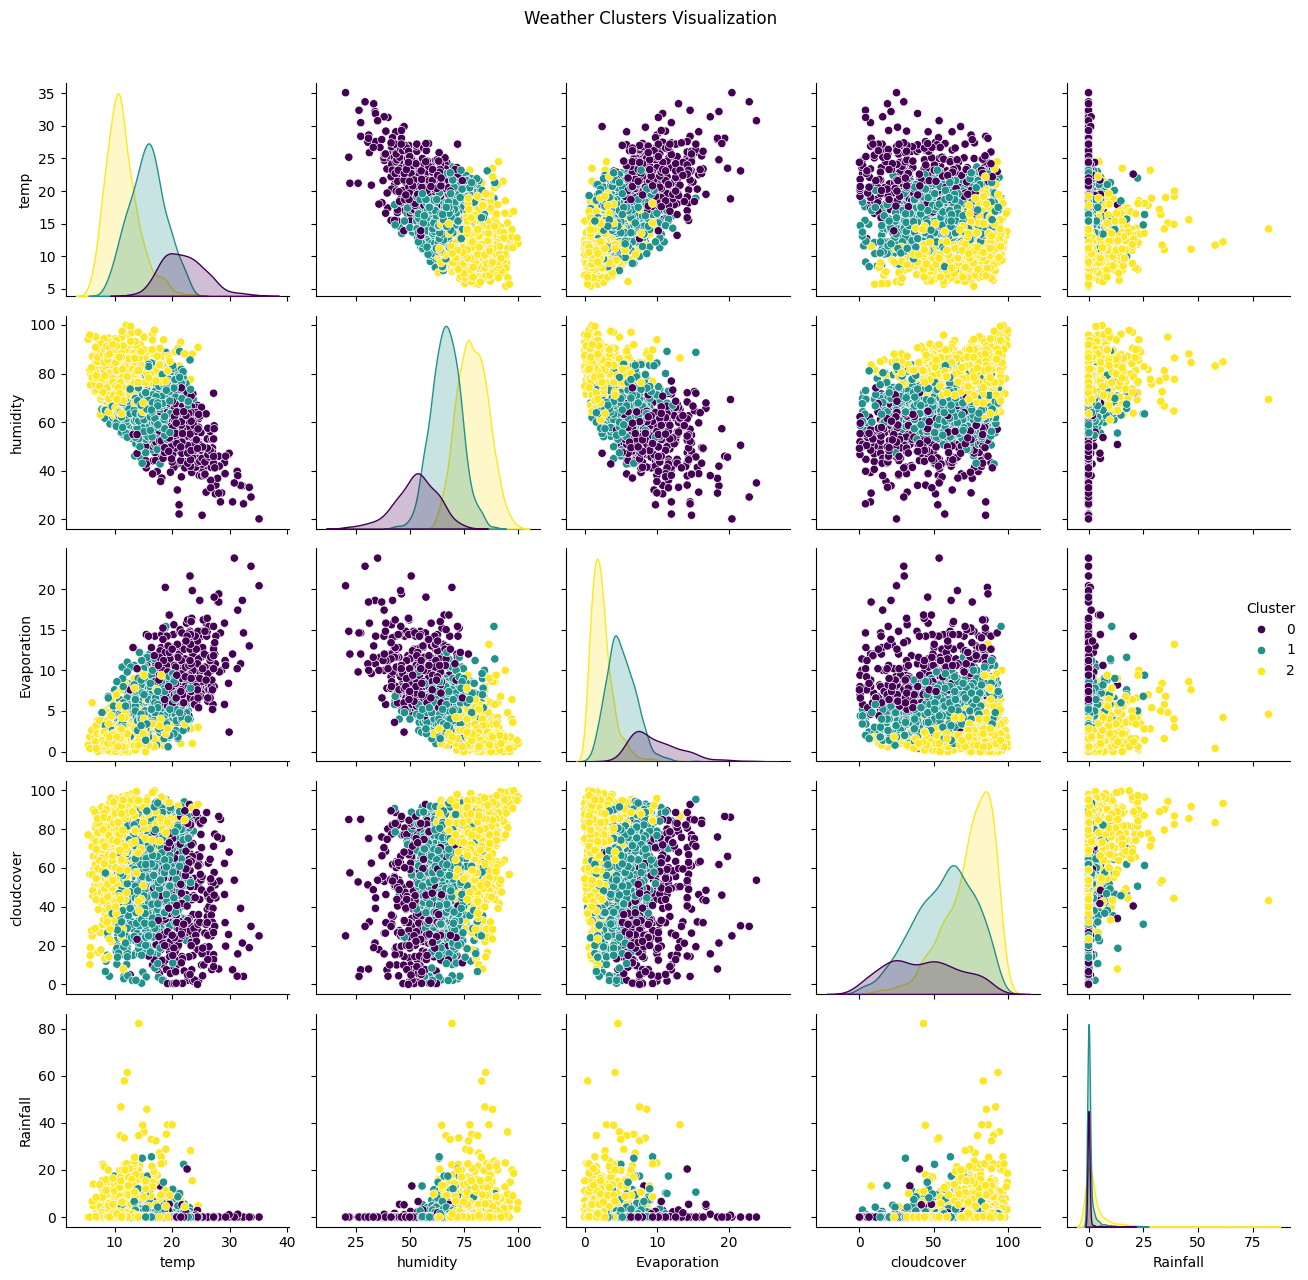

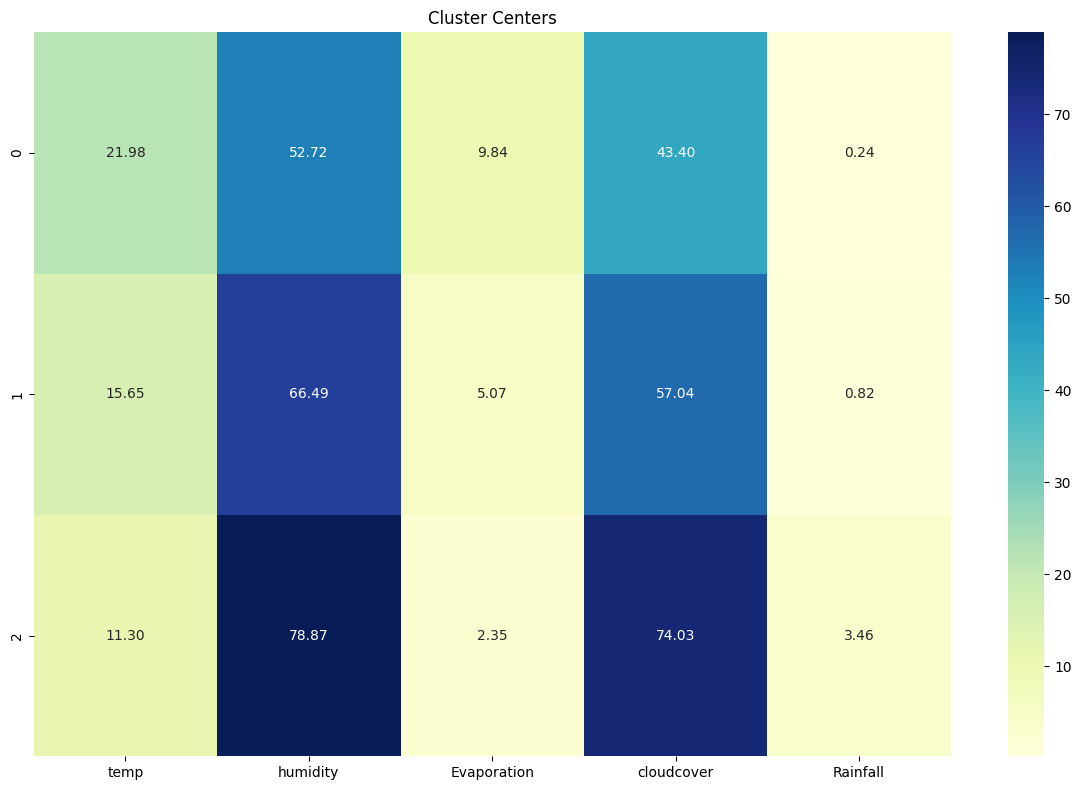

In [ ]:
# Perform K-means clustering
n_clusters = 3  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters by mapping on a pair plot of different features
plt.figure(figsize=(15, 15))
sns.pairplot(df[features + ['Cluster']], hue='Cluster', palette='viridis')
plt.suptitle('Weather Clusters Visualization', y=1.02)
plt.tight_layout()
plt.show()

# Visualize cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
center_df = pd.DataFrame(cluster_centers, columns=features)

plt.figure(figsize=(12, 8))
sns.heatmap(center_df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Cluster Centers')
plt.tight_layout()
plt.show()

### 2.2 DBScan (Optional)



*   DBSCAN is a density-based clustering algorithm that can be used when the number of cluster is unknown. It als handle noise in unpredictability data effectively, which is very common in data weather.

*   **DBSCAN Algorithm**: Instead of specifying the number of clusters, DBSCAN finds clusters based on how closely packed the data points are. The model can also detect noise points, which don’t fit into any cluster.
*   **Result**: Analyze how many clusters are found and how many points are considered noise. This is usually better when analyzing pattern with unpredicatble weather data where some value might not belong into any specific group.


*   **Visualization**: Visualize the DBSCAN clusters using a pair plot to see how data points are grouped.


<ipython-input-6-ccde45fd2500>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)


<Figure size 1500x1500 with 0 Axes>

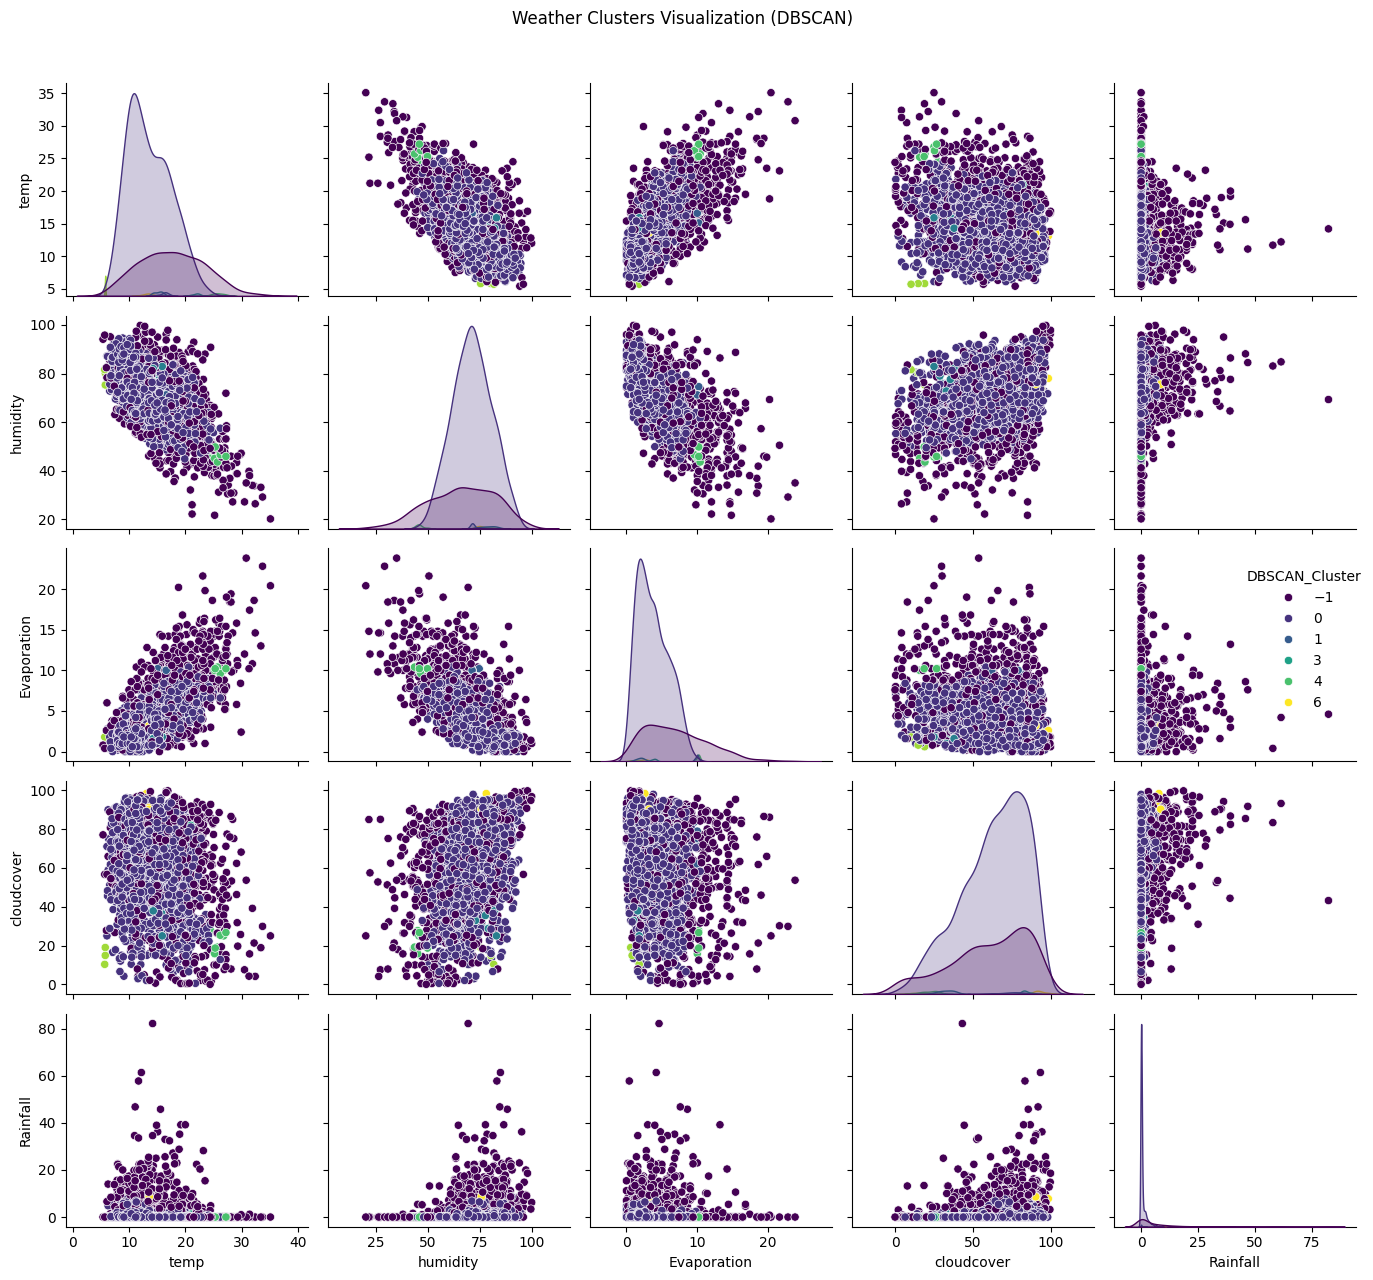

Number of clusters (DBSCAN): 8
Number of noise points (DBSCAN): 657


In [ ]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps and min_samples
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize the clusters using a pair plot
plt.figure(figsize=(15, 15))
sns.pairplot(df[features + ['DBSCAN_Cluster']], hue='DBSCAN_Cluster', palette='viridis')
plt.suptitle('Weather Clusters Visualization (DBSCAN)', y=1.02)
plt.tight_layout()
plt.show()

# Analyze the number of clusters and noise points
n_clusters_dbscan = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'] else 0)
n_noise_dbscan = list(df['DBSCAN_Cluster']).count(-1)

print(f'Number of clusters (DBSCAN): {n_clusters_dbscan}')
print(f'Number of noise points (DBSCAN): {n_noise_dbscan}')


### 2.3 Finalize


*   Based on K means clustering plot, analyze the characteristics of each cluster. This helps in interpreting what each cluster represents in terms of weather patterns.
*   **Cluster Mean Analysis**: Calculate the average values for temperature, humidity, evaporation, cloud cover, and rainfall in each cluster. This value provide a summary of typical weather conditions and value to expect in each group.
*   **Temporal Analysis**: Use a plot to show the distribution of clusters across different months, we can see if certain weather patterns (e.g., hot and dry days) are more common in specific seasons.



Cluster Characteristics:

Cluster 0:
temp           21.975477
humidity       52.722343
Evaporation     9.852316
cloudcover     43.304905
Rainfall        0.244142
dtype: float64

Cluster 1:
temp           15.663101
humidity       66.471344
Evaporation     5.071050
cloudcover     57.045535
Rainfall        0.823749
dtype: float64

Cluster 2:
temp           11.304194
humidity       78.859009
Evaporation     2.350429
cloudcover     74.028408
Rainfall        3.455291
dtype: float64


<ipython-input-8-009e335009fc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-8-009e335009fc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month


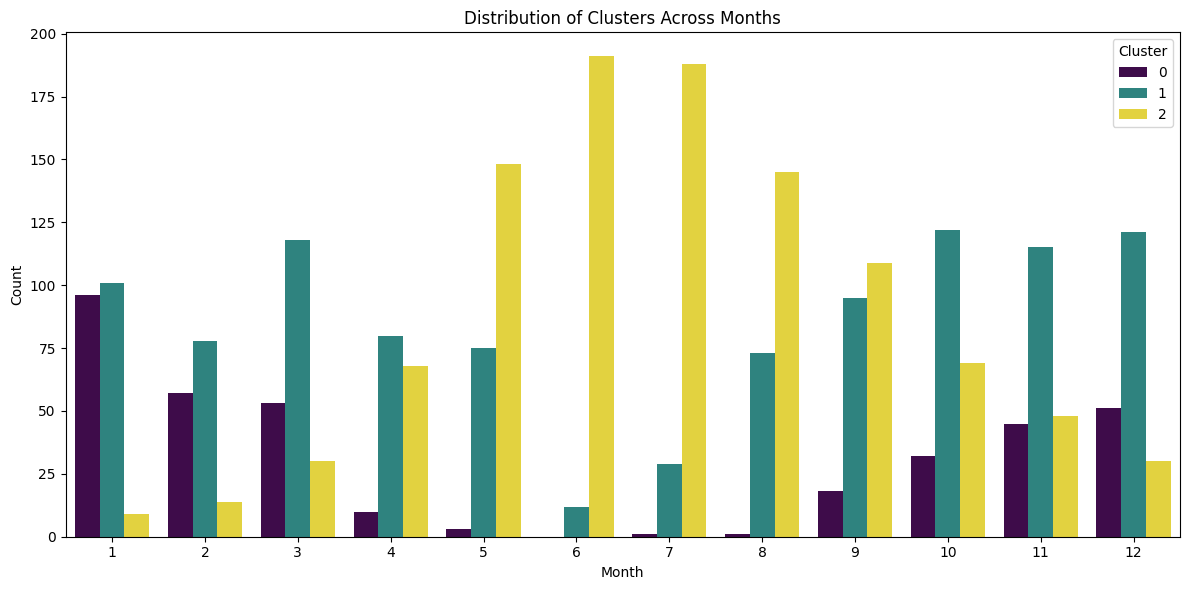

In [ ]:
# Analyze cluster characteristics
print("Cluster Characteristics:")
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(cluster_data[features].mean())

# Temporal analysis
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Month', hue='Cluster', palette='viridis')
plt.title('Distribution of Clusters Across Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

This clustering approach can help identify different weather patterns or "types of days" in Melbourne based on the selected features. For example, you might find clusters representing:

* Hot and dry days
* Cool and humid days
* Moderate weather days

The visualizations will help you understand how these clusters are distributed and how they relate to different weather variables. The temporal analysis can reveal if certain weather patterns are more common in specific months.

## 3. Evaluation



1.   Elbow Method

*   **Purpose**: Value to find the optimal number of clusters in KMeans.
*   **Explanation**: We plot the inertia for different numbers of clusters. The "elbow" point indicates the best number, where adding more clusters no longer significantly improves the fit.


2.   Silhouette Score

*   **Purpose**: To measure how well-separated the clusters are.
*   **Explanation**: A higher Silhouette Score indicates clearer cluster boundaries.



3.   Davies-Bouldin Index

*   **Purpose**: To assess cluster separation quality.
*   **Explanation**: A lower Davies-Bouldin score means better-defined clusters.








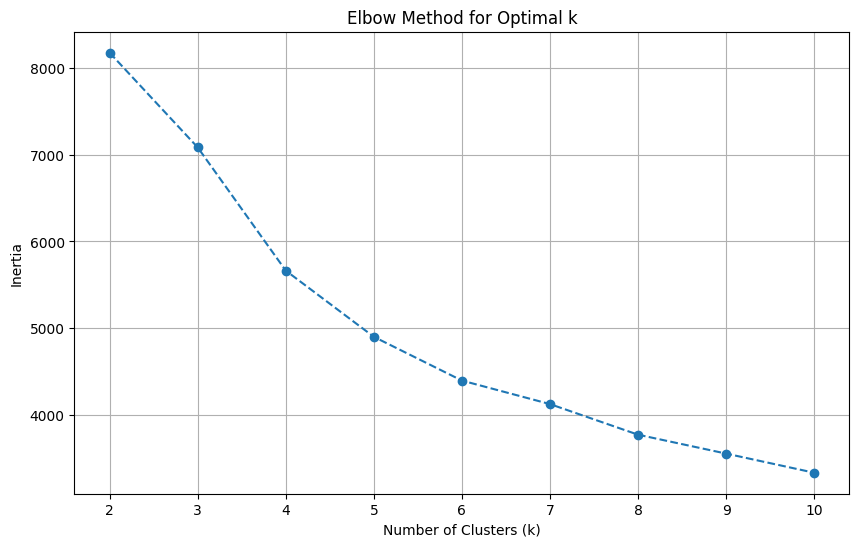

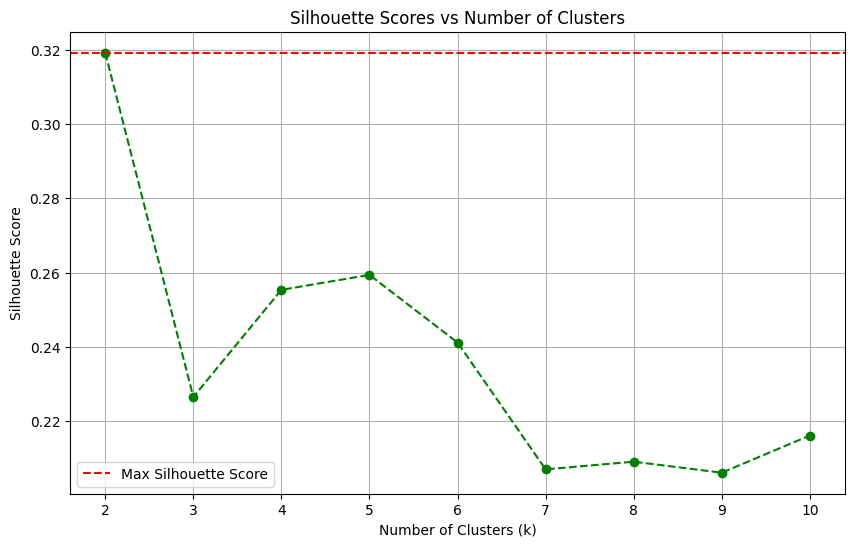

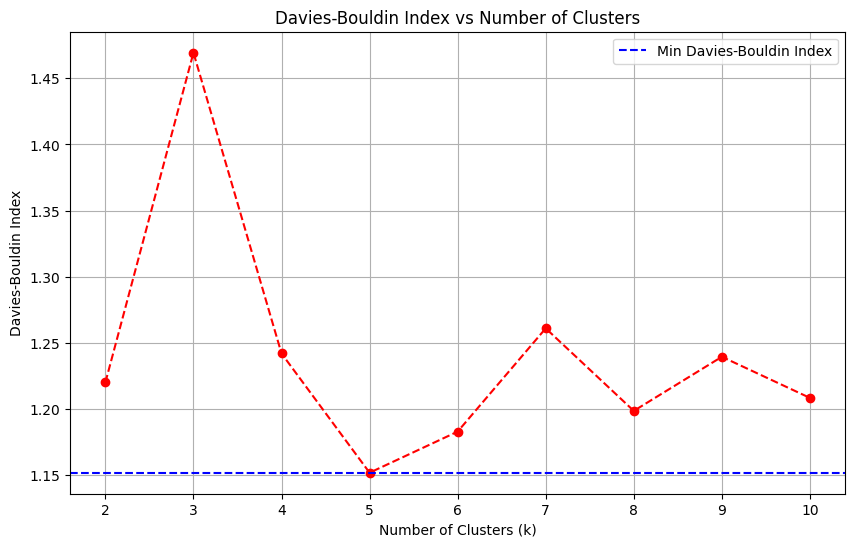

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Function to calculate Elbow Method, Silhouette Score, and Davies-Bouldin Index
def evaluate_clustering(X_scaled, max_clusters=10):
    inertia_values = []
    silhouette_scores = []
    davies_bouldin_scores = []

    # Evaluate k-means clustering for different number of clusters
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_scaled)

        # Calculate inertia (within-cluster sum of squares)
        inertia_values.append(kmeans.inertia_)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_scaled, labels)
        silhouette_scores.append(silhouette_avg)

        # Calculate Davies-Bouldin index
        db_score = davies_bouldin_score(X_scaled, labels)
        davies_bouldin_scores.append(db_score)

    # Plot Elbow Method (inertia vs. number of clusters)
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), inertia_values, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(range(2, max_clusters + 1))  # Ensure all k values are shown
    plt.grid(True)
    plt.show()

    # Plot Silhouette Scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--', color='green')
    plt.title('Silhouette Scores vs Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.xticks(range(2, max_clusters + 1))
    plt.axhline(y=max(silhouette_scores), color='red', linestyle='--', label='Max Silhouette Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Davies-Bouldin Index
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o', linestyle='--', color='red')
    plt.title('Davies-Bouldin Index vs Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Davies-Bouldin Index')
    plt.xticks(range(2, max_clusters + 1))
    plt.axhline(y=min(davies_bouldin_scores), color='blue', linestyle='--', label='Min Davies-Bouldin Index')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the evaluation function for a specific season
evaluate_clustering(X_scaled, max_clusters=10)


# 4. Save the model

In [ ]:
import pickle

# Save the model to a file
filename = 'model_3.pkl'
pickle.dump(kmeans, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to model_3.pkl
